In [1]:
import funclib as flib

Increase in alpha with generation times, using parameters similar to humans

In [2]:
# Parameters
n_e = 5/3e9
y_rate = 1e-9
averaged_g = 29
ratio_g = 1
Gs = list(np.linspace(0.6, 1, 1000)) + list(np.linspace(1, 35, 1000)) + list(np.linspace(35,200,100))
log10_Gs = np.log10(Gs)

# Iterate over paternal-to-maternal generation time ratios
results = []

for ratio_g in np.linspace(0.5,1.5,5):

    m_age, p_age = averaged_g,averaged_g
    mu_f, mu_m = flib.get_parental_age_effects_yrate(y_rate, m_age, p_age, n_e, 4)

    for g in Gs:

        m_age, p_age = flib.ratioG(g, ratio_g)
        alpha = flib.predict_alpha(mu_f, mu_m, m_age, p_age, n_e)
        results.append([np.mean([m_age,p_age]),m_age,p_age,mu_m,mu_f,ratio_g,alpha])

Convert to dataframe

In [3]:
curve_df = pd.DataFrame(results)
curve_df.columns = ["average_age","m_age","p_age","mu_m","mu_f","G_time_ratio","alpha"]
curve_df["log_average_age"] = np.log10(curve_df.average_age)

Plot

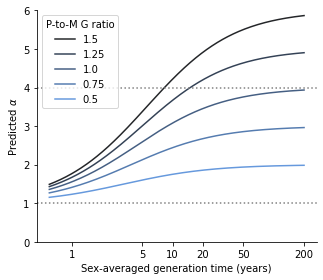

In [4]:
f,ax = plt.subplots(figsize=[4.6,4])

sns.lineplot(data=curve_df,x="log_average_age",y="alpha",hue="G_time_ratio",ax=ax,palette=sns.dark_palette("#69d", reverse=True, as_cmap=True))
ax.axhline(y=4, linestyle="dotted", color="gray")
ax.axhline(y=1, linestyle="dotted", color="gray")

original_Gs = [1,5,10,20,50,200]
xlabels = [1,5,10,20,50,200]
log10_Gs = np.log10(original_Gs)
ax.set_ylim([0,6])
ax.set_xticks(log10_Gs)
ax.set_xticklabels(xlabels)
ax.set_xlabel(r"Sex-averaged generation time (years)")
ax.set_ylabel(r"Predicted $\alpha$")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],title="P-to-M G ratio")
sns.despine()
plt.tight_layout()

#plt.savefig("../pdfs/Figure_SX_G_time_ratio_asymptote_200y.pdf")